In [9]:
import pandas as pd
import px_reader as px
import matplotlib.pyplot as plt
from helpers import *
%matplotlib inline

In [7]:
charge_revenu = read_file('charge-revenu.px')
charge_revenu.head()

BS  \
1995 Ecolage                                              7057248.00   
     Autres moyens propres de la haute ecole              3944795.00   
     Canton universitaire: couverture ou budget          86693000.00   
     Canton: imputations internes (jusqu'en 1999)               0.00   
     Autres cantons: accord intercantonal universitaire  17783363.00   

                                                                   BE  \
1995 Ecolage                                               8015360.00   
     Autres moyens propres de la haute ecole              29832250.64   
     Canton universitaire: couverture ou budget          262899000.00   
     Canton: imputations internes (jusqu'en 1999)           442000.00   
     Autres cantons: accord intercantonal universitaire   30926256.00   

                                                                  FR  \
1995 Ecolage                                              5144737.50   
     Autres moyens propres de la haute ecole              3530732.00   
     Canton universitaire: couverture ou budget          33095904.30   
     Canton: imputations internes (jusqu'en 1999)               0.00   
     Autres cantons: accord intercantonal universitaire  40067064.40   

                                                                   GE  \
1995 Ecolage                                               3400000.00   
     Autres moyens propres de la haute ecole               7710000.00   
     Canton universitaire: couverture ou budget          279440000.00   
     Canton: imputations internes (jusqu'en 1999)          1958000.00   
     Autres cantons: accord intercantonal universitaire   22358000.00   

                                                                   LS  \
1995 Ecolage                                               5811377.00   
     Autres moyens propres de la haute ecole               3777604.08   
     Canton universitaire: couverture ou budget          150095000.00   
     Canton: imputations internes (jusqu'en 1999)                0.00   
     Autres cantons: accord intercantonal universitaire   20910540.00   

                                                                 LU  \
1995 Ecolage                                              198405.00   
     Autres moyens propres de la haute ecole               94816.00   
     Canton universitaire: couverture ou budget          3846854.00   
     Canton: imputations internes (jusqu'en 1999)              0.00   
     Autres cantons: accord intercantonal universitaire  1124035.00   

                                                                  NE  \
1995 Ecolage                                              1921134.00   
     Autres moyens propres de la haute ecole              1135937.00   
     Canton universitaire: couverture ou budget          28989988.00   
     Canton: imputations internes (jusqu'en 1999)               0.00   
     Autres cantons: accord intercantonal universitaire  10147579.00   

                                                                  SG  \
1995 Ecolage                                              3484643.00   
     Autres moyens propres de la haute ecole              1443054.00   
     Canton universitaire: couverture ou budget          22115000.00   
     Canton: imputations internes (jusqu'en 1999)         2923000.00   
     Autres cantons: accord intercantonal universitaire  17319754.00   

                                                                  UZH   USI  \
1995 Ecolage                                              18823722.00  0.00   
     Autres moyens propres de la haute ecole              49688289.00  0.00   
     Canton universitaire: couverture ou budget          391236460.00  0.00   
     Canton: imputations internes (jusqu'en 1999)                0.00  0.00   
     Autres cantons: accord intercantonal universitaire   53931787.00  0.00   

                                                               EPFL  \
1995 Ecolage                                

In [10]:
charge_revenu = parse_df(charge_revenu)
charge_revenu = charge_revenu.reset_index(level=[0])
charge_revenu = charge_revenu.rename(columns = {'level_0': 'annee'})
years = charge_revenu['annee'].unique()
categories = charge_revenu.index.unique()
categories_to_drop = [x for x in categories if '1999' in x]
charge_revenu.drop(categories_to_drop, inplace=True)
charge_revenu.head()

,annee,BS,BE,FR,GE,LS,LU,NE,SG,UZH,USI,EPFL,ETHZ,Autres IU
Ecolage,1995,7057248.0,8.015360e+06,5144737.5,3400000.0,5.811377e+06,198405.0,1921134.0,3484643.0,18823722.0,0.0,3041000.0,5591000.0,0.0
Autres moyens propres de la haute ecole,1995,3944795.0,2.983225e+07,3530732.0,7710000.0,3.777604e+06,94816.0,1135937.0,1443054.0,49688289.0,0.0,0.0,0.0,0.0
Canton universitaire: couverture ou budget,1995,86693000.0,2.628990e+08,33095904.3,279440000.0,1.500950e+08,3846854.0,28989988.0,22115000.0,391236460.0,0.0,0.0,0.0,0.0
Autres cantons: accord intercantonal universitaire,1995,17783363.0,3.092626e+07,40067064.4,22358000.0,2.091054e+07,1124035.0,10147579.0,17319754.0,53931787.0,0.0,0.0,0.0,0.0
Autres cantons: autres subventions,1995,43201433.0,8.500000e+04,0.0,0.0,0.000000e+00,324530.0,810653.0,0.0,1784433.0,0.0,0.0,0.0,0.0


Categories de revenus : 
- Etudiants : 'Ecolage'
- Uni : 
    - 'Autres moyens propres de la haute ecole'
    - 'Revenus des prestations de service'
    - 'Revenus de la formation continue'
    - 'Frais centraux de la haute ecole couverts par des overheads'
- Canton : 
    - 'Canton universitaire: couverture ou budget'
    - 'Autres cantons: accord intercantonal universitaire'
    - 'Autres cantons: autres subventions'
- Confédération : 
    - 'Confederation: contributions aux investissements figurant dans le compte courant, selon LAU'
    - 'Confederation: contributions liees e des projets de cooperation et deinnovation, selon LAU'
    - 'Confederation: autres subventions' 
    - 'Fondations'
    - 'Confederation: subventions de base LAU'
    - 'Confederation: enveloppe budgetaire EPF'
- Projets/recherche : 
    - 'Financement de projets de l'UE par le FNS (des 2015)',
    - 'Projets du FNS', 
    - 'Projets de la CTI',
    - 'Programmes de recherche de leUE', 
    - 'Autres programmes internationaux',
    - 'Mandats de recherche de la Confederation',
    - 'Financement de projets de l'UE par le SEFRI (des 2015)',
    - 'Mandats de recherche du secteur prive',
    - 'Mandats de recherche des autres collectivites publiques'

In [11]:
etudiants =  ['Ecolage']
universite = ['Autres moyens propres de la haute ecole', 'Revenus des prestations de service',
       'Revenus de la formation continue', 'Frais centraux de la haute ecole couverts par des overheads']
cantons = ['Canton universitaire: couverture ou budget','Autres cantons: accord intercantonal universitaire'
    , 'Autres cantons: autres subventions']
confederation = ['Confederation: contributions aux investissements figurant dans le compte courant, selon LAU'
    , 'Confederation: contributions liees e des projets de cooperation et deinnovation, selon LAU'
    , 'Confederation: autres subventions' 
    , 'Fondations'
    , 'Confederation: subventions de base LAU'
    , 'Confederation: enveloppe budgetaire EPF']
projets_recherche = ['Financement de projets de l\'UE par le FNS (des 2015)',
    'Projets du FNS', 
    'Projets de la CTI',
     'Programmes de recherche de leUE', 
     'Autres programmes internationaux',
     'Mandats de recherche de la Confederation',
     'Financement de projets de l\'UE par le SEFRI (des 2015)',
     'Mandats de recherche du secteur prive',
    'Mandats de recherche des autres collectivites publiques']

In [12]:
def get_df_for_uni(uni, summarized = True):
    uni_df = pd.DataFrame(columns = charge_revenu.index.unique())
    uni_df.insert(loc=0, column='annee', value=years)
    tmp_df = charge_revenu[['annee', uni]]
    for c in tmp_df.index.unique():
        serie = tmp_df.loc[c][uni].reset_index()
        uni_df[c] = serie[uni]
    if not summarized : 
        return uni_df
    else:
        uni_df['uni'] = uni_df[universite].sum(axis=1)
        uni_df = uni_df.drop(universite, axis = 1)

        uni_df['cantons'] = uni_df[cantons].sum(axis=1)
        uni_df = uni_df.drop(cantons, axis = 1)

        uni_df['confederation'] = uni_df[confederation].sum(axis=1)
        uni_df = uni_df.drop(confederation, axis = 1)

        uni_df['projets/recherche'] = uni_df[projets_recherche].sum(axis=1)
        uni_df = uni_df.drop(projets_recherche, axis = 1)
        return uni_df

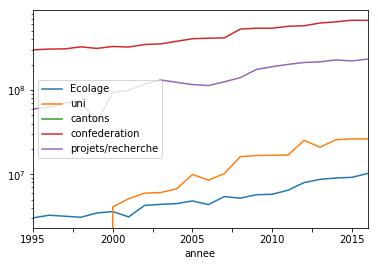

In [19]:
summ_EPFL = get_df_for_uni('EPFL', True)
summ_EPFL.plot(x = 'annee', kind='line', legend = True, logy = True)

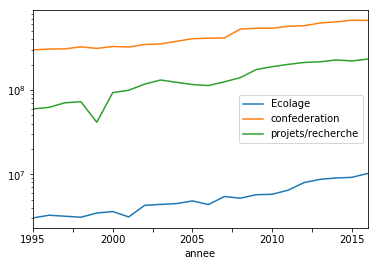

In [18]:
summ_EPFL[['annee','Ecolage','confederation', 'projets/recherche']].plot(x = 'annee', kind='line', logy = True)